# Use FL to Service Bank Loans
###  ***Introduction***
We integrate meta-learning[1], personalization layers[2] and Fedavg[3] to form a new federated learning framework. Here is a demonstration of how to use the framework to help banks judge whether a debtor will take out a loan.
###  ***Dataset***
Loan dataset[4] is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.
***Note:*** The data set here is simulated using CTAB-GAN+[5].
###  ***Structure***
1. The first is to train using meta-learning, with 500 training times and an epoch of 10. After training, we can get a good initial federated learning model for financial tasks in a short time.    
2. Finally, we load the above model parameters with a federated learning model with a personalization layer. Then, we train with the training parameter 30 and the epoch 30. After training, we can get a federated learning model that works well.
###  ***Reference***
[1] A. Fallah, A. Mokhtari, and A. Ozdaglar, “Personalized Federated Learning: A Meta-Learning Approach,” arXiv preprint arXiv:2002.07948, 2020.  
[2] M. G. Arivazhagan, V. Aggarwal, A. K. Singh, and S. Choudhary, “Federated Learning with Personalization Layers,” arXiv preprint arXiv:1912.00818, 2019.  
[3] B. McMahan, E. Moore, D. Ramage, S. Hampson, and B. A. y Arcas, “Communication-Efficient Learning of Deep Networks from Decentralized Data,” in Artificial intelligence and statistics. PMLR, 2017, pp. 1273–1282.    
[4] Sunil Jacob (2024). Bank_Loan_modelling [Dataset]. Kaggle Repository. Available: https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling/data       
[5] Z. Zhao, A. Kunar, R. Birke, H. Van der Scheer, and L. Y. Chen, “CTAB-GAN+: Enhancing Tabular Data Synthesis,” Frontiers in big Data, vol. 6, p. 1296508, 2024.

***Time ： 2024/12/07 23:58***  
***Author ： Chuang Liu***  
***Email ：LIUC0316@126.COM***  
***File ：demonstration.ipynb***  
***Notebook ：Jupyter*** 

In [1]:
import argparse
from server import PerFed
from visualization import visualization_client_train, visualization_client_accuracy, visualization_server_loss, visualization_server_accuracy
import torch

***Note:*** Some model hyperparameters and task parameters are described in detail in help.

In [2]:
parser = argparse.ArgumentParser()

parser.add_argument('--meta_learning', type=bool, default=True, help='whether to use meta learning')
parser.add_argument('--parameters_path', type=str, default='meta_parameters', help='path of saved parameters')
parser.add_argument('--rounds', type=int, default=500, help='number of communication rounds')
parser.add_argument('--clients_num', type=int, default=10, help='number of total clients')
parser.add_argument('--local_epochs', type=int, default=10, help='number of local epochs')
parser.add_argument('--input_dim', type=int, default=12, help='input dimension')
parser.add_argument('--alpha', type=float, default=0.01, help='learning rate')
parser.add_argument('--beta', type=float, default=0.001, help='learning rate')
parser.add_argument('--Kp', type=int, default=2, help='number of personalized layers')
parser.add_argument('--total', type=int, default=5, help='number of total layers')
parser.add_argument('--C', type=float, default=0.5, help='sampling rate')
parser.add_argument('--B', type=int, default=25, help='local batch size')
parser.add_argument('--device', default=torch.device("cuda" if torch.cuda.is_available() else "cpu"))
clients = ['Client' + str(i) for i in range(10)]
parser.add_argument('--clients', default=clients)

args = parser.parse_args(args=[])

***Note:*** Initializes the model, which is the meta-learning mode.

In [3]:
FL = PerFed(args)
print(FL.args.meta_learning)

True


***Note:*** Train and test the model.

In [4]:
rounds, loss_train, loss_val, accuracy_val, accuracy_test, loss, accuracy = FL.server()

--------------------------------------------------------------------------------------------------------------------------------------
Meta Learning----round 1----
Client----loss_train: 0.23342727423645554	loss_val: 0.23401028223335746	accuracy_val: 0.6682	accuracy_test: 0.66896
Server----loss: 0.22064823538064957		accuracy: 0.9224
--------------------------------------------------------------------------------------------------------------------------------------
Meta Learning----round 2----
Client----loss_train: 0.23077651612693448	loss_val: 0.2311653166636825	accuracy_val: 0.7533000000000001	accuracy_test: 0.7534399999999999
Server----loss: 0.2200032838061452		accuracy: 0.9224
--------------------------------------------------------------------------------------------------------------------------------------
Meta Learning----round 3----
Client----loss_train: 0.2108318316540681	loss_val: 0.2112854086980224	accuracy_val: 0.924	accuracy_test: 0.9223999999999999
Server----loss: 0.21934

***Note:*** Model effect visualization.

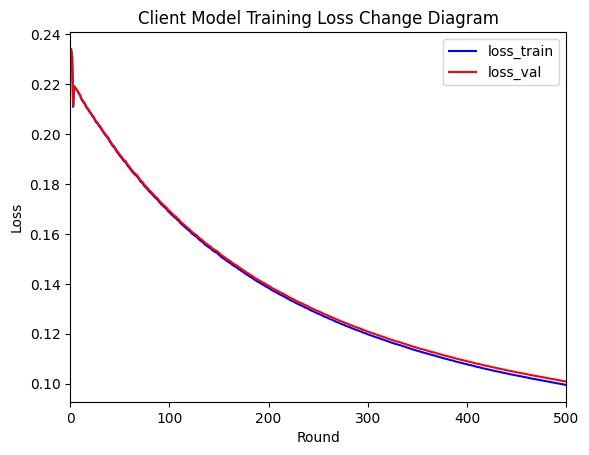

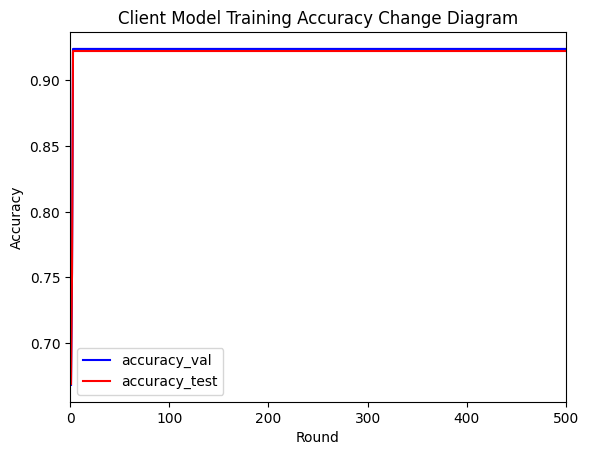

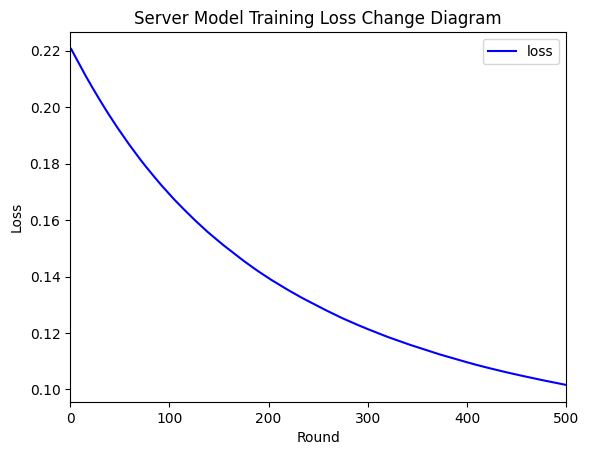

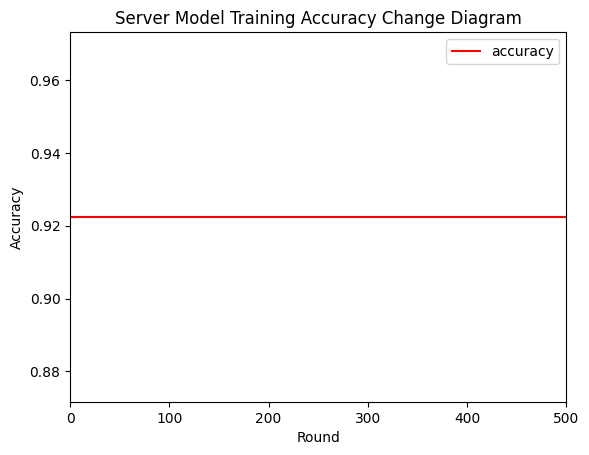

In [5]:
visualization_client_train(rounds, loss_train, loss_val)
visualization_client_accuracy(rounds, accuracy_val, accuracy_test)
visualization_server_loss(rounds, loss)
visualization_server_accuracy(rounds, accuracy)

In [6]:
args.meta_learning = False
FL = PerFed(args)
print(FL.args.meta_learning)

False


In [7]:
rounds, loss_train, loss_val, accuracy_val, accuracy_test, loss, accuracy = FL.server()

--------------------------------------------------------------------------------------------------------------------------------------
Federated Learning----round 1----
Client 0----train----loss: 0.06978376675440814   accuracy: 0.9275
Client 1----train----loss: 0.0695014682879264   accuracy: 0.9272500000000001
Client 2----train----loss: 0.06655400023591937   accuracy: 0.9315
Client 3----train----loss: 0.07155986153462436   accuracy: 0.9247500000000001
Client 4----train----loss: 0.0699269968031149   accuracy: 0.927125
Client 5----train----loss: 0.07173110520670889   accuracy: 0.9251250000000001
Client 6----train----loss: 0.07043254583491944   accuracy: 0.9265000000000001
Client 7----train----loss: 0.07031349985598354   accuracy: 0.92675
Client 8----train----loss: 0.07271313892269973   accuracy: 0.9237500000000001
Client 9----train----loss: 0.07020478505131905   accuracy: 0.9269999999999999
Client----loss_train: 0.06537047557823826	loss_val: 0.06784383421356324	accuracy_val: 0.924	accura

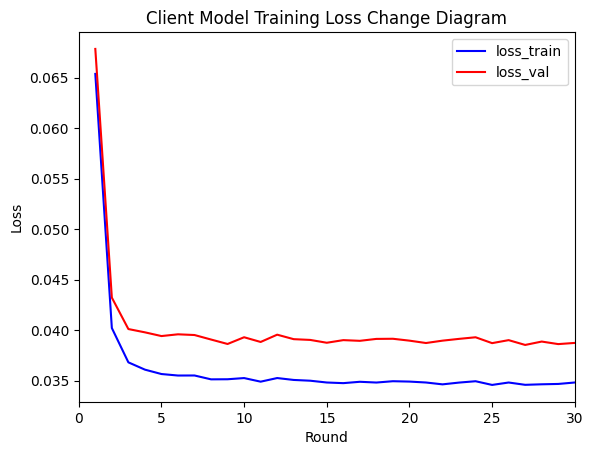

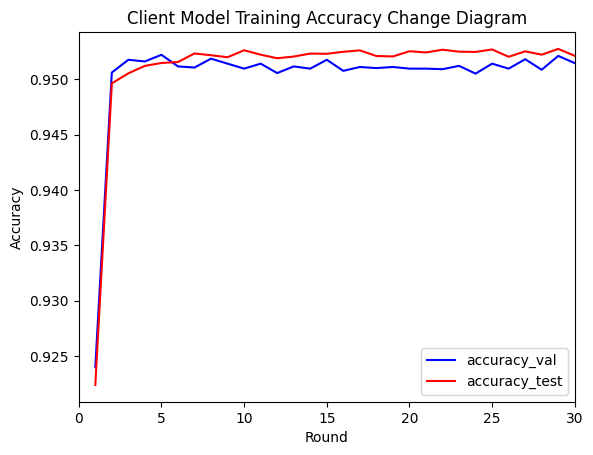

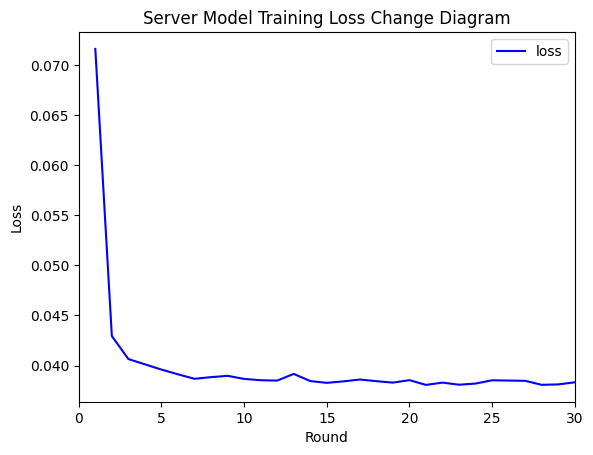

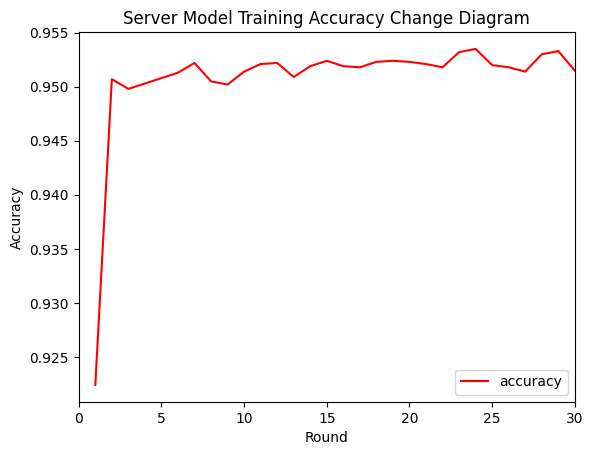

In [8]:
visualization_client_train(rounds, loss_train, loss_val)
visualization_client_accuracy(rounds, accuracy_val, accuracy_test)
visualization_server_loss(rounds, loss)
visualization_server_accuracy(rounds, accuracy)